In [1]:
import numpy as np
import math
def func_grad(x,y,w,k):
    k+=1
    m=len(x)
    n=len(x[0])
    x=np.array(x)
    del_J=[]
    for j in range(n):
        out=[]
        for i in range(m):
            mul=0
            sub=0
            dot=0
            dot=np.dot(w,np.array(x[i]))
            sig=1/(1+np.exp(-dot))
            sub=sig-y[i]
            mul=(sub*x[i][j]/m) if abs(sub*x[i][j]/m)<1e308 else (sub*x[i][j]/m)*1e308/abs(sub*x[i][j]/m) # edited this to avoid overflow warning
            if mul:
                out.append(mul)
        out=sum(out)
        del_J.append(out)
    return del_J

def grad_desc(x,y,w,e,alpha):
    k=0
    for i in range(len(x)):
        x[i].insert(0,1)
    #print('hi')
    while(True):
        k+=1
        del_J=np.array(func_grad(x,y,w,k))
        if np.linalg.norm(np.array(del_J))<e or k==5000: # added a new constraint
            print(np.linalg.norm(np.array(del_J)))
            return w
        else:
            w=np.subtract(w,alpha*del_J)

In [2]:
import pandas as pd
import math
df=pd.read_csv("C:\\Users\\Krishna\\Downloads\\Logistic_regression_ls.csv")
y = list(df.iloc[:,2])
x = df.iloc[:, [0, 1]]
x = x.values.tolist()
w=[1,1,1]
w_fin=grad_desc(x,y,w,0.0001,0.01) 
print(w_fin)

0.045540540088521125
[-4.16236071  0.56444359  0.60230216]


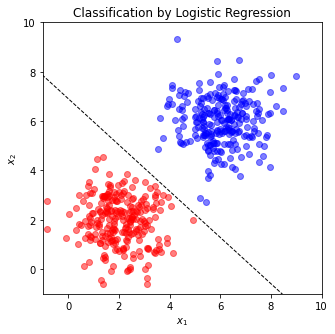

array([[ 7.395e+00,  7.638e+00],
       [ 4.987e+00,  6.485e+00],
       [ 5.358e+00,  6.499e+00],
       [ 2.036e+00,  2.380e+00],
       [ 5.956e+00,  7.378e+00],
       [ 5.160e+00,  7.249e+00],
       [ 1.691e+00,  2.343e+00],
       [ 1.983e+00,  3.399e+00],
       [ 1.570e+00,  3.440e+00],
       [ 6.018e+00,  5.584e+00],
       [ 1.843e+00,  2.091e+00],
       [ 6.184e+00,  6.967e+00],
       [ 4.223e+00,  6.059e+00],
       [ 5.477e+00,  7.023e+00],
       [ 3.021e+00,  1.742e+00],
       [ 2.313e+00,  2.083e+00],
       [ 3.101e+00, -3.400e-01],
       [ 1.754e+00,  1.370e-01],
       [ 2.164e+00,  7.860e-01],
       [ 1.601e+00,  2.982e+00],
       [ 5.736e+00,  6.461e+00],
       [ 5.721e+00,  5.204e+00],
       [ 3.362e+00,  2.460e+00],
       [ 1.930e+00,  2.758e+00],
       [ 5.613e+00,  7.575e+00],
       [ 1.833e+00,  2.385e+00],
       [ 5.042e+00,  6.211e+00],
       [ 6.820e+00,  4.552e+00],
       [-1.010e-01,  1.271e+00],
       [ 9.480e-01,  2.279e+00],
       [ 6

In [3]:
import matplotlib.pyplot as plt

c = -w_fin[0]/w_fin[2]
m = -w_fin[1]/w_fin[2]

x = df.iloc[:, [0, 1]].values
y = np.array(y)

xd = np.linspace(-10,10,100)
yd = m*xd+c

fig = plt.figure(figsize=(5,5))
plt.scatter(x[y==0,0],x[y==0,1],color='red', alpha=0.5)
plt.scatter(x[y==1,0],x[y==1,1],color='blue', alpha=0.5)
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.title('Classification by Logistic Regression')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(xd,yd,'k',lw=1,ls='--')
plt.show()
x

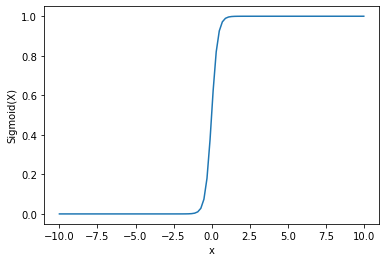

In classification, we have to predict the probablity of output as 1 or 0. The sigmoid function exists between (0,1) and mostly gives values that are 0 or 1 except for a small range of input around 0 which can modified by changing the coefficient of x. Hence, sigmoid function is useful in classification problem


In [51]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(k):
    x= np.linspace(-10,10,100)
    
    sig=(1/(1+np.exp(-k*x)))
    plt.figure()
    plt.plot(x,sig)
    plt.xlabel("x")
    plt.ylabel("Sigmoid(X)")
    plt.show()
sigmoid(5)
print('In classification, we have to predict the probablity of output as 1 or 0. The sigmoid function exists between (0,1) and mostly gives values that are 0 or 1 except for a small range of input around 0 which can modified by changing the coefficient of x. Hence, sigmoid function is useful in classification problem')


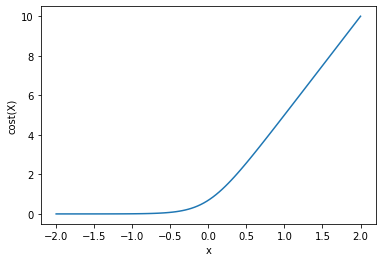

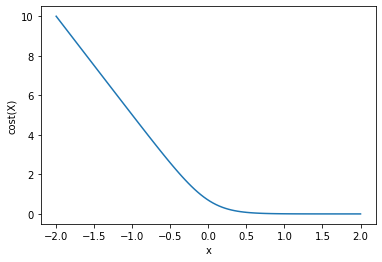

for y=0:
if hw(x) =0 => cost = 0 
if hw(x) =1 => cost = infinity(large)
for y=1:
if hw(x) =0 => cost = infinity(large) 
if hw(x) =1 => cost = 0 


In [52]:
import numpy as np
from matplotlib import pyplot as plt
def cost(y,k):
    x= np.linspace(-10/k,10/k,100)
    sig=(1/(1+np.exp(-k*x)))
    if y==0:
        cost=-np.log(1-sig)
        
    if y==1:
        cost=-np.log(sig)
    plt.figure()
    plt.plot(x,cost)
    plt.xlabel("x")
    plt.ylabel("cost(X)")
    plt.show()
cost(0,5)
cost(1,5)
print('for y=0:\nif hw(x) =0 => cost = 0 \nif hw(x) =1 => cost = infinity(large)\nfor y=1:\nif hw(x) =0 => cost = infinity(large) \nif hw(x) =1 => cost = 0 ')  	

[0.5512968233493378, -0.029061781342694545]


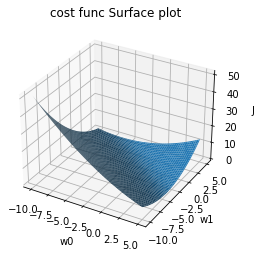

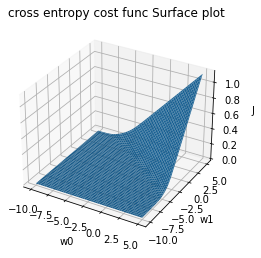

C:\Users\Krishna\AppData\Local\Temp/ipykernel_6716/917416069.py:35: RuntimeWarning: divide by zero encountered in log
  sum1+=(-y[i]*(np.log(sig))-(1-y[i])*np.log(1-sig))


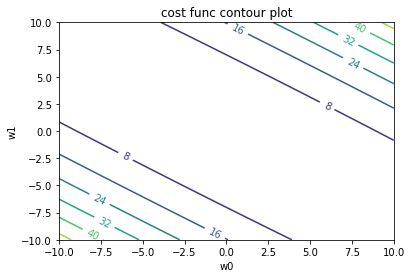

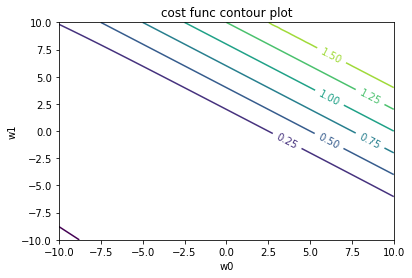

In [55]:
import numpy as np
from matplotlib import pyplot as plt



def grad_J(X,w,y):
    
    x=np.array(X)
    

    dJ=[]
    for j in range(len(X[0])):
        out=0
        for i in range(len(X)):
            out+=((np.dot(np.array(w),(np.array(x[i]).T)))-y[i])*x.T[j][i]/len(X)
        dJ.append(out)
    return dJ

def cost(X, y, w):
    sum1 = 0
    for i in range(len(X[0])):
        tmp = 0
        for j in range(len(X[i])):
            tmp += (w[1]*X[i][j] + w[0])
        sum1 += (tmp - y[i])**2
    return sum1/(2*len(X))

def crossCost(X,y,w):
    sum1 = 0
    for i in range(len(X[0])):
        tmp=0
        for j in range(len(X[i])):
            tmp+= (w[1]*X[i][j] + w[0])
        sig = (1/(1+np.exp(-tmp)))
        sum1+=(-y[i]*(np.log(sig))-(1-y[i])*np.log(1-sig))
    return sum1/len(X)
    
def surf_plot(w,X,y):
    x=np.linspace(-10,5,100)
    y1=np.linspace(-10,5,100)
    w0,w1=np.meshgrid(x,y1)
    #Jw =cost(X,y,w)
    Jw=[]
    Jw_cross=[]
    for i in range(len(w0)):
        temp = []
        for j in range(len(w0[i])):
            temp.append(cost(X, y, [w0[i][j], w1[i][j]]))
        Jw.append(temp)
    for i in range(len(w0)):
        temp_cross = []
        for j in range(len(w0[i])):
            temp_cross.append(crossCost(X, y, [w0[i][j], w1[i][j]]))
        Jw_cross.append(temp_cross)
    Jw = np.array(Jw)
    Jw_cross=np.array(Jw_cross)
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title('cost func Surface plot')
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_zlabel('J')
    ax.plot_surface(w0,w1,Jw)
    
    fig2=plt.figure()
    ax=fig2.add_subplot(111,projection='3d')
    ax.set_title('cross entropy cost func Surface plot')
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_zlabel('J')
    ax.plot_surface(w0,w1,Jw_cross)
    plt.show()



def cont_plot(w,X,y):
    x=np.linspace(-10,10,100)
    y1=np.linspace(-10,10,100)
    w0,w1=np.meshgrid(x,y1)
    Jw=[]
    Jw_cross=[]
    for i in range(len(w0)):
        temp = []
        for j in range(len(w0[i])):
            temp.append(cost(X, y, [w0[i][j], w1[i][j]]))
        Jw.append(temp)
    for i in range(len(w0)):
        temp_cross = []
        for j in range(len(w0[i])):
            temp_cross.append(crossCost(X, y, [w0[i][j], w1[i][j]]))
        Jw_cross.append(temp_cross)
    Jw = np.array(Jw)
    fig=plt.figure()
    cp=plt.contour(w0,w1,Jw)
    plt.clabel(cp)
    plt.title('cost func contour plot')
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.figure(4)
    cp=plt.contour(w0,w1,Jw_cross)
    plt.clabel(cp)
    plt.title('cost func contour plot')
    plt.xlabel('w0')
    plt.ylabel('w1')
    



def constAlpha(X,y,w):
    e=0.00001
    alp=0.01
    for i in range(len(X)):
        X[i].insert(0,1)
        
    while(True):

        dJ=grad_J(X,w,y)
        if np.linalg.norm(np.array(dJ))<=abs(e):
            return w
        else:
            w=[w[i]-alp*dJ[i] for i in range(len(dJ))]



import random
random.seed(8)
X=[[random.randint(0,6)] for i in range(40)]
y=[random.randint(0,1) for i in range(40)]



w=[1,1]
w0=constAlpha(X,y,w)
print(w0)

surf_plot(w0,X,y)
cont_plot(w0,X,y)
